In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Load the dataset from local file
iris_df = pd.read_csv('iris_data.csv')

# Display first 5 rows
print(iris_df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(iris_df.info())

# Statistical summary
print("\nStatistical Summary:")
print(iris_df.describe())

# Check for missing values
print("\nMissing Values:")
print(iris_df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
# The column names are not standard; let's inspect and rename them for clarity
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print(iris_df['species'].value_counts())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None

Statistical Summary:
              5.1         3.5         1.4         0.2
count  149.000000  149.000000  149.000000  149.000000
mean     5.848322    3.051007    3.774497    1.205369
std      0.828594    0.433499    1.759651    0.761292
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.80000

/home/aymn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aymn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aymn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aymn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

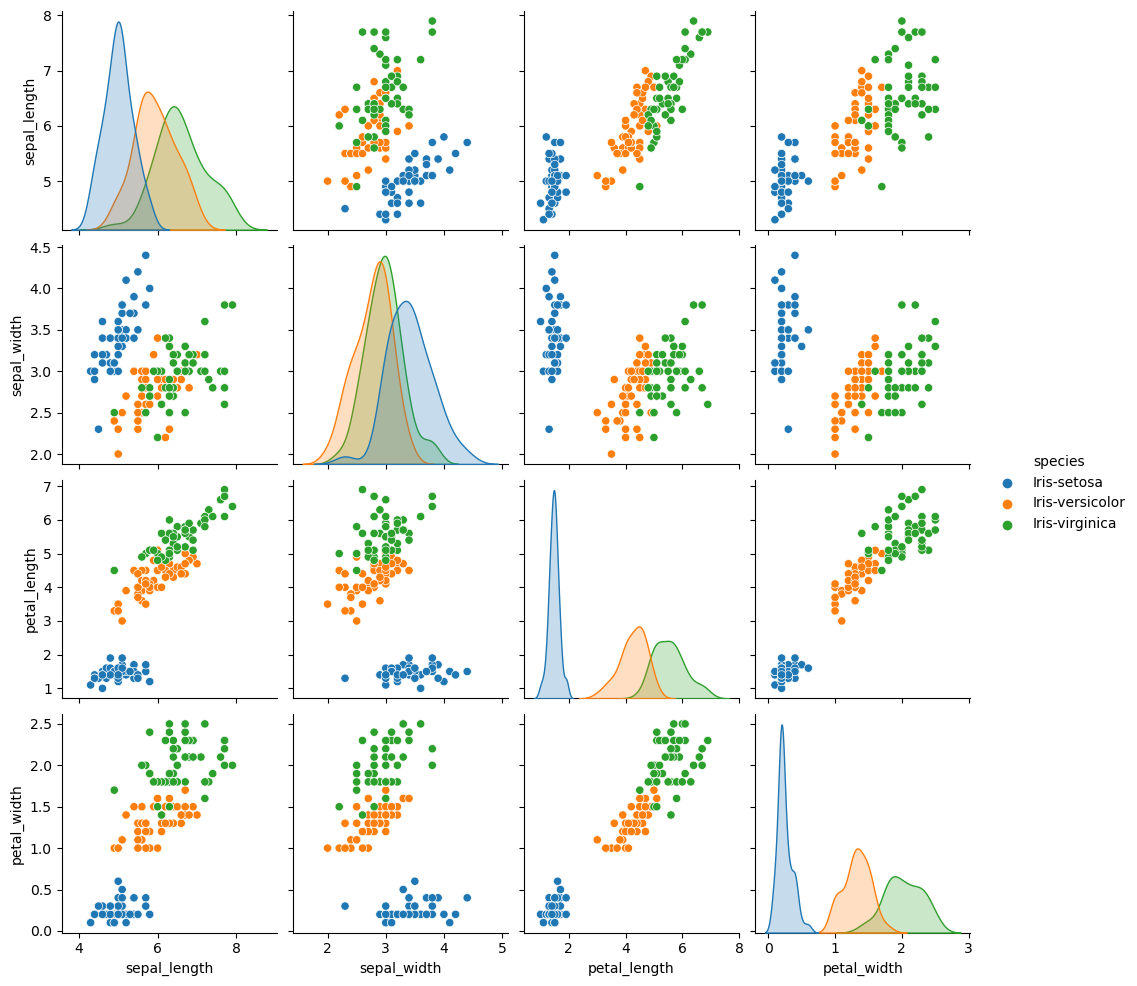

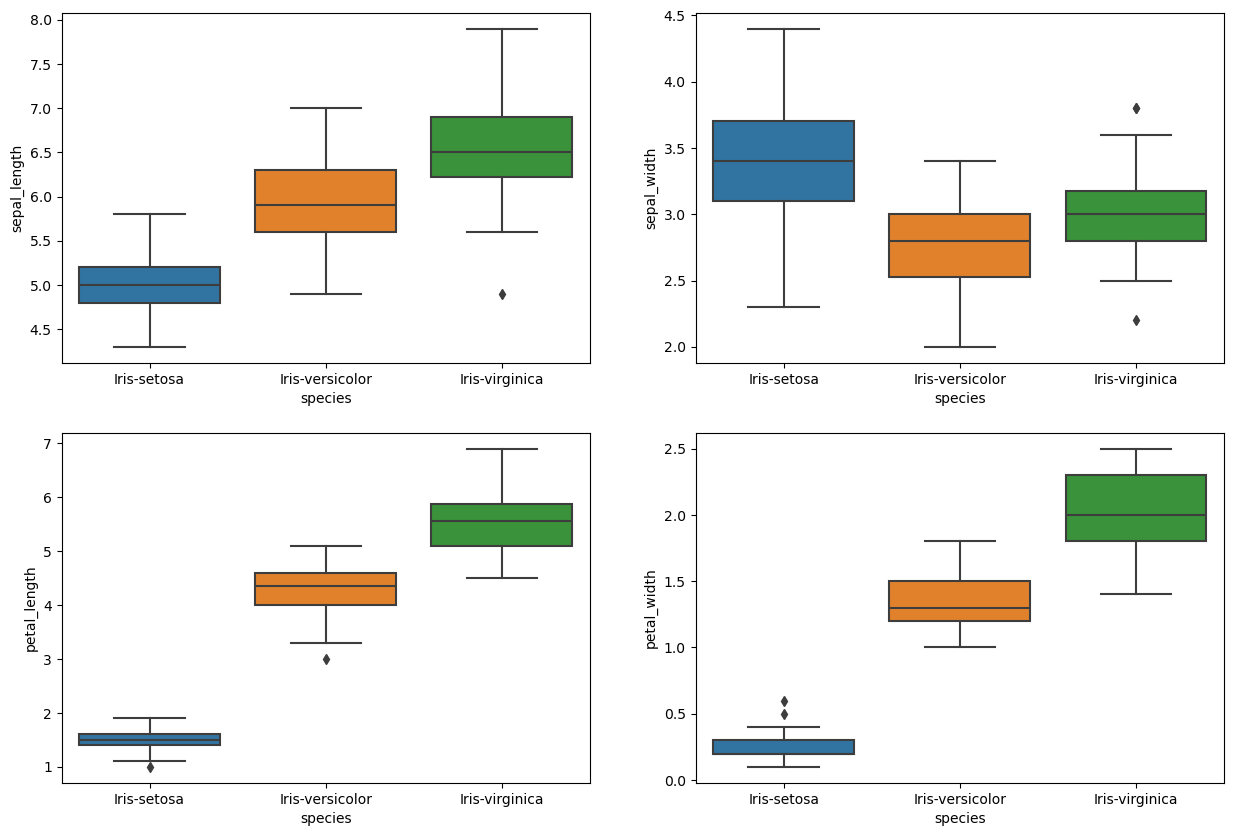

In [8]:
# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='species')  # Changed to 'species'
plt.show()

# Box plots for each feature
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris_df)  # Adjusted column names
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris_df)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris_df)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris_df)
plt.show()

In [9]:
# Separate features and target variable
X = iris_df.drop('species', axis=1)  # Changed to 'species'
y = iris_df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

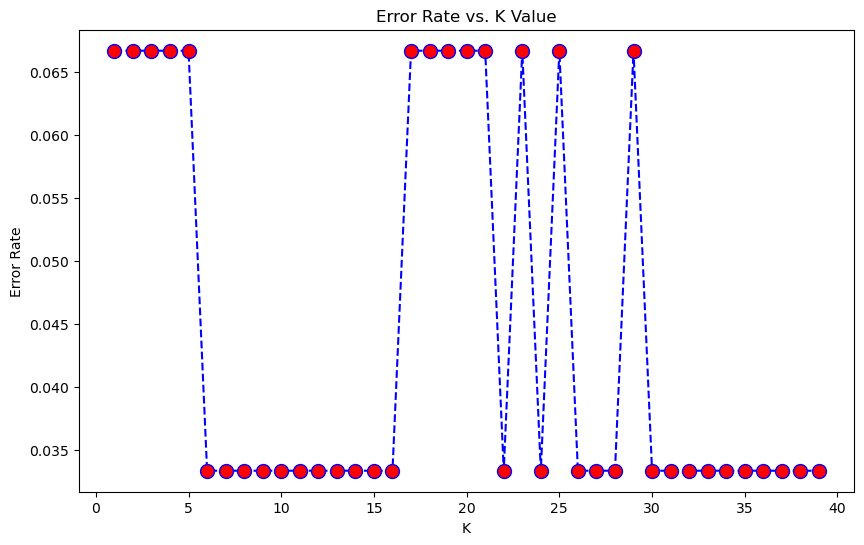

Optimal K value: 6


In [10]:
# Finding the best K value
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate vs K value
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Choose the K with the lowest error rate
optimal_k = error_rate.index(min(error_rate)) + 1
print(f"Optimal K value: {optimal_k}")

In [11]:
# Initialize the KNN classifier with optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [12]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30


Accuracy Score: 0.9666666666666667


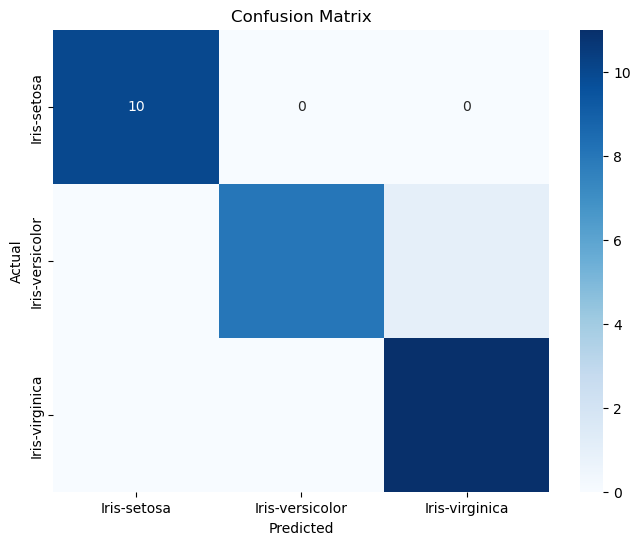

In [13]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris_df['species'].unique(),
            yticklabels=iris_df['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Example of predicting new data
new_data = [[5.1, 3.5, 1.4, 0.2]]  # sepal_length, sepal_width, petal_length, petal_width
new_data_scaled = scaler.transform(new_data)
prediction = knn.predict(new_data_scaled)
print(f"Predicted species for {new_data[0]}: {prediction[0]}")

Predicted species for [5.1, 3.5, 1.4, 0.2]: Iris-setosa


/home/aymn/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# Save the model for future use
import joblib

# Save the model and scaler
joblib.dump(knn, 'iris_knn_model.pkl')
joblib.dump(scaler, 'iris_scaler.pkl')

# To load them later:
# knn = joblib.load('iris_knn_model.pkl')
# scaler = joblib.load('iris_scaler.pkl')

['iris_scaler.pkl']